In [1]:
import kan
import kan.utils as ku
import torch
import torch.nn as nn
import numpy as np
from libraries import utils
from libraries import magnetization
from libraries import j1j2_functions
import numpy.random as npr
import qutip as qt
import sympy
import random

In [2]:
N=10
input = utils.generate_input_torch(N)
labels = torch.tensor([-1 + 2 * (magnetization.count_half_magnetization(i) % 2) for i in range(2 ** N)]).reshape((-1, 1))

In [3]:
dataset = {'train_input': input, 'train_label': labels, 'test_input': input, 'test_label': labels}
kan_model = kan.KAN(width = [N, N, N, 1, 1])
kan_model(dataset['train_input']);

checkpoint directory created: ./model
saving model version 0.0


In [4]:
tanh = lambda x : torch.tanh(x)
kan_model.fix_symbolic(3, 0, 0, tanh)
kan_model.symbolic_fun[3].affine = nn.Parameter(torch.tensor([[[1, 0, 1, 0]]], dtype = torch.float64), requires_grad=False)
for i in range(N):
    for j in range(N):
        kan_model.fix_symbolic(0, j, i, 'x', verbose=False)

saving model version 0.1
saving model version 0.2
saving model version 0.3
saving model version 0.4
saving model version 0.5
saving model version 0.6
saving model version 0.7
saving model version 0.8
saving model version 0.9
saving model version 0.10
saving model version 0.11
saving model version 0.12
saving model version 0.13
saving model version 0.14
saving model version 0.15
saving model version 0.16
saving model version 0.17
saving model version 0.18
saving model version 0.19
saving model version 0.20
saving model version 0.21
saving model version 0.22
saving model version 0.23
saving model version 0.24
saving model version 0.25
saving model version 0.26
saving model version 0.27
saving model version 0.28
saving model version 0.29
saving model version 0.30
saving model version 0.31
saving model version 0.32
saving model version 0.33
saving model version 0.34
saving model version 0.35
saving model version 0.36
saving model version 0.37
saving model version 0.38
saving model version 

In [5]:
kan_model.fit(dataset, steps=20, lamb=1e-4); # seems we should decrease lamb the more nodes we have

| train_loss: 3.94e-03 | test_loss: 3.94e-03 | reg: 9.59e+00 | : 100%|█| 20/20 [00:42<00:00,  2.12s/

saving model version 0.102


In [6]:
kan_model(input)

tensor([[-0.9955],
        [ 0.9996],
        [-0.9955],
        ...,
        [ 0.9996],
        [-0.9952],
        [ 0.9996]], grad_fn=<AddBackward0>)

In [7]:
labels

tensor([[-1],
        [ 1],
        [-1],
        ...,
        [ 1],
        [-1],
        [ 1]])

saving model version 0.103


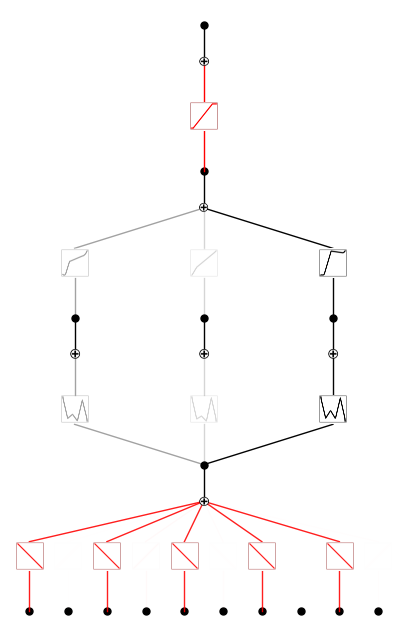

In [8]:
kan_model.prune().plot()

In [9]:
kan_model = kan_model.prune()
kan_model.symbolic_fun[3].affine = nn.Parameter(kan_model.symbolic_fun[3].affine.data, requires_grad=False)

saving model version 0.103


   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       tan    0.869731 -2.940326           3                3   -1.158228
1       1/x    0.729569 -1.886617           2                2   -0.720632
2     1/x^3    0.755989 -2.034921           3                3   -0.524445
3     1/x^2    0.628750 -1.429500           2                2   -0.400650
4       sin    0.595503 -1.305765           2                2   -0.314035
5       cos    0.595466 -1.305631           2                2   -0.313942
6  gaussian    0.666693 -1.585034           3                3   -0.209524
7         0    0.000000  0.000014           0                0    0.000010
8     1/x^5    0.734549 -1.913427           5                5    0.160601
9     1/x^4    0.632629 -1.444653           4                4    0.188743
   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       tan    0.894689 -3.247129           3                3   -1.372990
1       1/x    0.785084 -

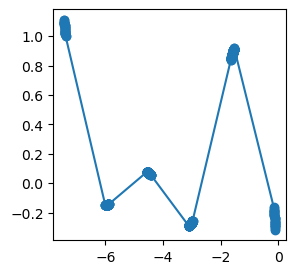

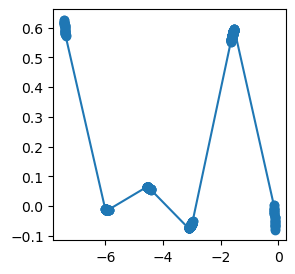

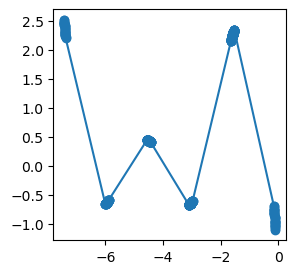

In [10]:
for i in range(0, kan_model.width[2][0]):
    kan_model.suggest_symbolic(1, 0, i, weight_simple=0.3, topk=10);
    kan_model.get_fun(1, 0, i);

   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0  gaussian    0.995737 -7.870681           3                3   -4.609477
1      tanh    0.995531 -7.802557           3                3   -4.561790
2    arctan    0.995773 -7.882889           4                4   -4.318022
3       sin    0.951160 -4.355510           2                2   -2.448857
4       cos    0.951160 -4.355509           2                2   -2.448856
5       x^2    0.951074 -4.352962           2                2   -2.447073
6       exp    0.947317 -4.246253           2                2   -2.372377
7     1/x^2    0.941737 -4.101039           2                2   -2.270727
8       1/x    0.938599 -4.025370           2                2   -2.217759
9       x^3    0.953751 -4.434121           3                3   -2.203885
    function  fitting r2    r2 loss  complexity  complexity loss  total loss
0        exp    0.999680 -11.563868           2                2   -7.494708
1      1/x^2    0.999

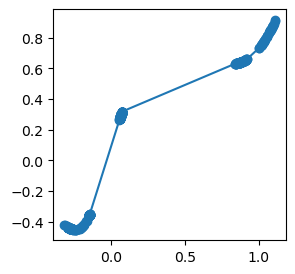

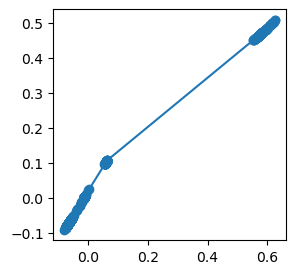

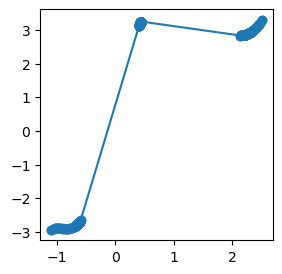

In [11]:
for i in range(kan_model.width[2][0]):
    kan_model.suggest_symbolic(2, i, 0, weight_simple = 0.3, topk=10);
    kan_model.get_fun(2, i, 0);

In [12]:
kan_model.auto_symbolic(weight_simple = 0.3, r2_threshold = 0.9)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (0,7,0) since already symbolic
skipping (0,8,0) since already symbolic
skipping (0,9,0) since already symbolic
For (1,0,0) the best fit was tan, but r^2 = 0.8697312474250793 and this is lower than 0.9. This edge was omitted, keep training or try a different threshold.
For (1,0,1) the best fit was tan, but r^2 = 0.8946885466575623 and this is lower than 0.9. This edge was omitted, keep training or try a different threshold.
For (1,0,2) the best fit was tan, but r^2 = 0.8354473114013672 and this is lower than 0.9. This edge was omitted, keep training or try a different threshold.
fixing (2,0,0) with gaussian, r2=0.9957374334335327, c=3
fixing (2,1,0) with exp, r2=0.999679684638977, c=2
fixing (2,2,0) wit

In [13]:
# kan_model.fix_symbolic(1, 0, 1, 'tan');
# kan_model.fix_symbolic(1, 1, 1, 'tan');
# for i in range(0, N, 2):
#     kan_model.fix_symbolic(0, i, 0, 'x');
#     kan_model.fix_symbolic(0, i, 1, 'x');

In [15]:
kan_model.saveckpt('./increase_depth_MSR')

In [22]:
kan_model = kan.KAN.loadckpt('./increase_depth_MSR')

c:\Users\taoha\anaconda3\envs\kans\Lib\site-packages\kan\MultKAN.py:571: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f'{path}_state')
c:\Users\taoha\ana

KeyError: 'anonymous'

In [14]:
kan_model.fit(dataset, steps=50);

| train_loss: 1.64e-06 | test_loss: 1.64e-06 | reg: 4.84e+00 | : 100%|█| 50/50 [00:10<00:00,  4.84it

saving model version 0.105


saving model version 0.106


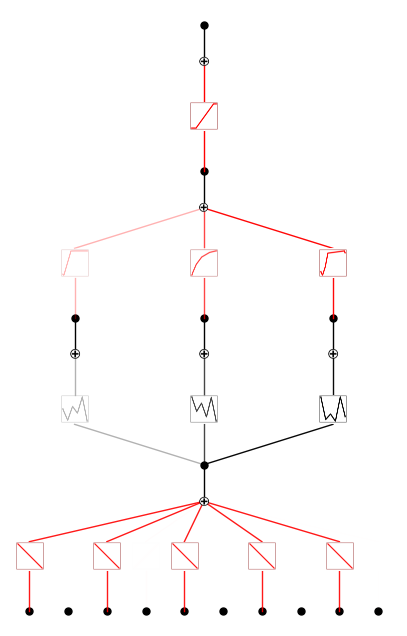

In [15]:
kan_model.prune().plot()

   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       tan    0.927848 -3.792607           3                3   -1.754825
1       cos    0.709304 -1.782366           2                2   -0.647656
2       sin    0.709299 -1.782343           2                2   -0.647640
3       1/x    0.606598 -1.345888           2                2   -0.342121
4     1/x^2    0.558128 -1.178267           2                2   -0.224787
5     1/x^3    0.612129 -1.366315           3                3   -0.056420
6         0    0.000000  0.000014           0                0    0.000010
7  gaussian    0.570107 -1.217916           3                3    0.047459
8         x    0.185146 -0.295368           1                1    0.093242
9     1/x^4    0.557963 -1.177727           4                4    0.375591
   function  fitting r2   r2 loss  complexity  complexity loss  total loss
0       sin    0.935523 -3.954850           2                2   -2.168395
1       cos    0.935498 -

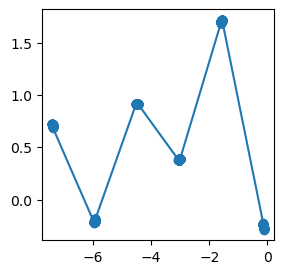

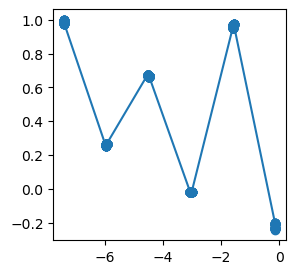

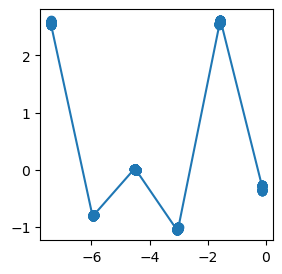

In [16]:
for i in range(0, kan_model.width[2][0]):
    kan_model.suggest_symbolic(1, 0, i, weight_simple=0.3, topk=10);
    kan_model.get_fun(1, 0, i);

In [17]:
kan_model.auto_symbolic(weight_simple=0.3, r2_threshold=0.8);

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (0,7,0) since already symbolic
skipping (0,8,0) since already symbolic
skipping (0,9,0) since already symbolic
fixing (1,0,0) with tan, r2=0.9278475046157837, c=3
fixing (1,0,1) with sin, r2=0.9355230927467346, c=2
fixing (1,0,2) with tan, r2=0.8524713516235352, c=3
skipping (2,0,0) since already symbolic
skipping (2,1,0) since already symbolic
skipping (2,2,0) since already symbolic
skipping (3,0,0) since already symbolic
saving model version 0.106


In [18]:
kan_model.fit(dataset, steps=20);

| train_loss: 2.21e-02 | test_loss: 2.21e-02 | reg: 0.00e+00 | : 100%|█| 20/20 [00:09<00:00,  2.20it

saving model version 0.107


In [19]:
import dill
import inspect
def symbolic_formula(self, var=None, normalizer=None, output_normalizer = None):
    '''
    get symbolic formula

    Args:
    -----
        var : None or a list of sympy expression
            input variables
        normalizer : [mean, std]
        output_normalizer : [mean, std]
        
    Returns:
    --------
        None

    Example
    -------
    >>> from kan import *
    >>> model = KAN(width=[2,1,1], grid=5, k=3, noise_scale=0.0, seed=0)
    >>> f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]])+x[:,[1]]**2)
    >>> dataset = create_dataset(f, n_var=3)
    >>> model.fit(dataset, opt='LBFGS', steps=20, lamb=0.001);
    >>> model.auto_symbolic()
    >>> model.symbolic_formula()[0][0]
    '''
    
    symbolic_acts = []
    symbolic_acts_premult = []
    x = []

    def ex_round(ex1, n_digit):
        ex2 = ex1
        for a in sympy.preorder_traversal(ex1):
            if isinstance(a, sympy.Float):
                ex2 = ex2.subs(a, round(a, n_digit))
        return ex2

    # define variables
    if var == None:
        for ii in range(1, self.width[0][0] + 1):
            exec(f"x{ii} = sympy.Symbol('x_{ii}')")
            exec(f"x.append(x{ii})")
    elif isinstance(var[0], sympy.Expr):
        x = var
    else:
        x = [sympy.symbols(var_) for var_ in var]

    x0 = x

    if normalizer != None:
        mean = normalizer[0]
        std = normalizer[1]
        x = [(x[i] - mean[i]) / std[i] for i in range(len(x))]

    symbolic_acts.append(x)

    for l in range(len(self.width_in) - 1):
        num_sum = self.width[l + 1][0]
        num_mult = self.width[l + 1][1]
        y = []
        for j in range(self.width_out[l + 1]):
            yj = 0.
            for i in range(self.width_in[l]):
                a, b, c, d = self.symbolic_fun[l].affine[j, i]
                sympy_fun = self.symbolic_fun[l].funs_sympy[j][i]
                try:
                    yj += c * sympy_fun(a * x[i] + b) + d
                except:
                    # sympy_fun = sympy.Function(f'{sympy_fun=}'.split('=')[0])
                    sympy_fun = sympy.Function(f'({inspect.getsource(sympy_fun)})')
                    yj += c * sympy_fun(a * x[i] + b) + d
                    # yj += c * sympy.tanh(a * x[i] + b) + d
                    print('make sure all activations need to be converted to symbolic formulas first!')
                    # return
            yj = self.subnode_scale[l][j] * yj + self.subnode_bias[l][j]
            y.append(yj)
                
        symbolic_acts_premult.append(y)
            
        mult = []
        for k in range(num_mult):
            if isinstance(self.mult_arity, int):
                mult_arity = self.mult_arity
            else:
                mult_arity = self.mult_arity[l+1][k]
            for i in range(mult_arity-1):
                if i == 0:
                    mult_k = y[num_sum+2*k] * y[num_sum+2*k+1]
                else:
                    mult_k = mult_k * y[num_sum+2*k+i+1]
            mult.append(mult_k)
            
        y = y[:num_sum] + mult
        
        for j in range(self.width_in[l+1]):
            y[j] = self.node_scale[l][j] * y[j] + self.node_bias[l][j]
        
        x = y
        symbolic_acts.append(x)

    if output_normalizer != None:
        output_layer = symbolic_acts[-1]
        means = output_normalizer[0]
        stds = output_normalizer[1]

        assert len(output_layer) == len(means), 'output_normalizer does not match the output layer'
        assert len(output_layer) == len(stds), 'output_normalizer does not match the output layer'
        
        output_layer = [(output_layer[i] * stds[i] + means[i]) for i in range(len(output_layer))]
        symbolic_acts[-1] = output_layer


    self.symbolic_acts = [[symbolic_acts[l][i] for i in range(len(symbolic_acts[l]))] for l in range(len(symbolic_acts))]
    self.symbolic_acts_premult = [[symbolic_acts_premult[l][i] for i in range(len(symbolic_acts_premult[l]))] for l in range(len(symbolic_acts_premult))]

    out_dim = len(symbolic_acts[-1])
    #return [symbolic_acts[-1][i] for i in range(len(symbolic_acts[-1]))], x0
    return [symbolic_acts[-1][i] for i in range(len(symbolic_acts[-1]))], x0

In [20]:
ku.ex_round(symbolic_formula(kan_model)[0][0], 4)

make sure all activations need to be converted to symbolic formulas first!


1.0*(tanh = lambda x : torch.tanh(x)
)(6.4463*sin(1.3241*tan(5.5441*x_1 - 0.0179*x_10 + 0.0001*x_2 + 5.5441*x_3 + 0.0001*x_4 + 5.4795*x_5 + 0.0001*x_6 + 5.4613*x_7 + 0.0002*x_8 + 5.5505*x_9 + 5.6231) - 3.7225) + 3.1694 - 13.6944*exp(-1.7398*sin(3.1238*x_1 - 0.0101*x_10 + 3.1238*x_3 + 3.0874*x_5 + 0.0001*x_6 + 3.0771*x_7 + 0.0001*x_8 + 3.1274*x_9 - 8.3192)) - 2.0028*exp(-8.3623*(0.4967*tan(5.057*x_1 - 0.0163*x_10 + 0.0001*x_2 + 5.0569*x_3 + 0.0001*x_4 + 4.998*x_5 + 0.0001*x_6 + 4.9814*x_7 + 0.0002*x_8 + 5.0628*x_9 - 6.2303) - 1)**2))

In [21]:
kan_model.fit(dataset, steps=50, lamb=1e-4);

| train_loss: 2.05e-02 | test_loss: 2.05e-02 | reg: 0.00e+00 | : 100%|█| 50/50 [00:07<00:00,  6.32it

saving model version 0.108
